In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tinygrid.utils import mase, denormalize
import numpy as np

In [17]:
with open("../tinygrid/temp/self_feed.csv", "r") as f:
  sliding_pred = f.read().split(",")
  sliding_pred = [float(i) for i in sliding_pred]

with open("../tinygrid/temp/pred_naive.csv", "r") as f:
  naive = f.read().split(",")
  naive = [float(i) for i in naive]

In [27]:
from tinygrid.dataloader import load_data_helper

comb_train, comb_test = load_data_helper()
y_true = np.array(comb_test['energy'])
y_train = np.array(comb_train['energy'])
mx, mi = y_true.max(), y_true.min()

# Denormalize
naive, sliding_pred = np.array(naive), np.array(sliding_pred)
naive = denormalize(naive, mx, mi)
sliding_pred = denormalize(sliding_pred, mx, mi)

mean square error: 0.06150113980145545
mean abs error: 0.13176502857302694
mean absolute scale error 2.237727262397302


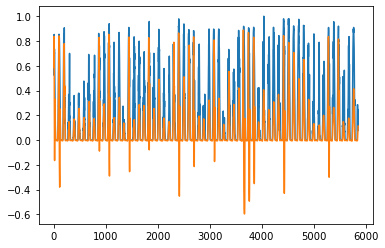

In [28]:
import matplotlib.pyplot as plt

ll = range(len(naive))
print("mean square error:", mean_squared_error(y_true, naive))
print("mean abs error:", mean_absolute_error(y_true, naive))
print("mean absolute scale error", mase(naive, y_true, y_train))
plt.plot(ll, y_true)
plt.plot(ll, naive)

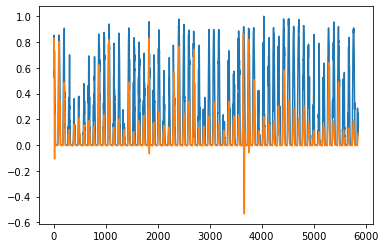

In [23]:
plt.plot(ll, y_true)
plt.plot(ll, sliding_pred)
print("mean square error:", mean_squared_error(y_true, sliding_pred))
print("mean abs error:", mean_absolute_error(y_true, sliding_pred))
print("mean absolute scale error", mase(naive, y_true, sliding_pred))